<ul>
    <li> <h2><b>Universidade de Brasília - UnB</b></h2> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Primeira (1/5) Atividade Prática Avaliativa
    Entrega da Atividade 01/10/2020 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol> 
<li> Colete os preços e volumes de um conjunto de ativos durante o período de 3 (três) anos, pertencentes a no mínimo 5 (cinco) Índices de Segmentos e Setoriais diferentes, e separe os 50 (cinquenta) ativos mais líquidos; </li><p></p>
    <li>Construa uma amostra de treinamento e outra de teste, sendo a primeira com os 2 (dois) primeiros anos e a segunda com o último anos; </li> <p></p>
    <li> Na amostra de treinamento, aplique uma clusterização não supervisionada (K-Means ou DBSCAN) e separe um ativo para cada clusters, com o critério que desejar (sugestão maior índice Sharpe); </li><p></p>
    <li> Aplique a Teoria do Portfolio Moderno de Markowitz nos ativos escolhidos no passo anterior, no sentido de alocar um capital de R$100.000,00; </li><p></p>
    <li> Verifique o resultado da alocação de capital com Markowitz, nos ativos separados na fase de treinamento, amostra de teste que representa o último ano da aquisição; </li><p></p>
    <li> Descreva suas impressores relativas ao processo e resultados encontrados. </li>
</ol>
</div>


### Questão 1: 

In [12]:
import pandas as pd
from pandas_datareader import data 
import investpy
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [13]:
lista = ['IFNC', 'BDRX', 'IMOB', 'ICON', 'IEE']

In [14]:
output = None
symbols=[]

for sy in tqdm(lista):
    try: 
        df = pd.read_html(f'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={sy}&idioma=pt-br')
        symbols=list(df[0]['Código'].values)        
        Symbols=[sy+'.SA' for sy in symbols]
        print(f"Ativos indice {sy} =", len(Symbols))
        
        if output is None:
            Ativos = Symbols
            output = Ativos
        else:
            Ativos = Symbols
            output = output + Ativos
    except:
        print("Erro ")
        
len(output)

100%|██████████| 5/5 [00:01<00:00,  2.79it/s]


Ativos indice IFNC = 21
Ativos indice BDRX = 129
Ativos indice IMOB = 21
Ativos indice ICON = 66
Ativos indice IEE = 19


256

In [15]:
def remove_repetidos(output):
    l = []
    for i in output:
        if i not in l:
            l.append(i)
    l.sort()
    return l

output.remove('Quantidade Teórica Total  Redutor.SA')
output = remove_repetidos(output)

In [16]:
len(output)
listaS = output

In [17]:
start_date = '2018-03-15'
end_date = '2021-03-15'

N= len(listaS)
output = None

for sy in tqdm(listaS[:N]): 
    try: 
        stock=data.DataReader(sy, 'yahoo',  start_date,  end_date)["Volume"]
        
        if output is None:
            df = stock
            output = df          
        else:
            df = stock
            output=pd.concat([output, df], axis=1)         
    except:
        print("Erro "+ sy)

output.columns=listaS[:N-1]

100%|██████████| 240/240 [09:21<00:00,  2.34s/it]


Erro Quantidade Teórica Total  Redutor.SA


<AxesSubplot:ylabel='Date'>

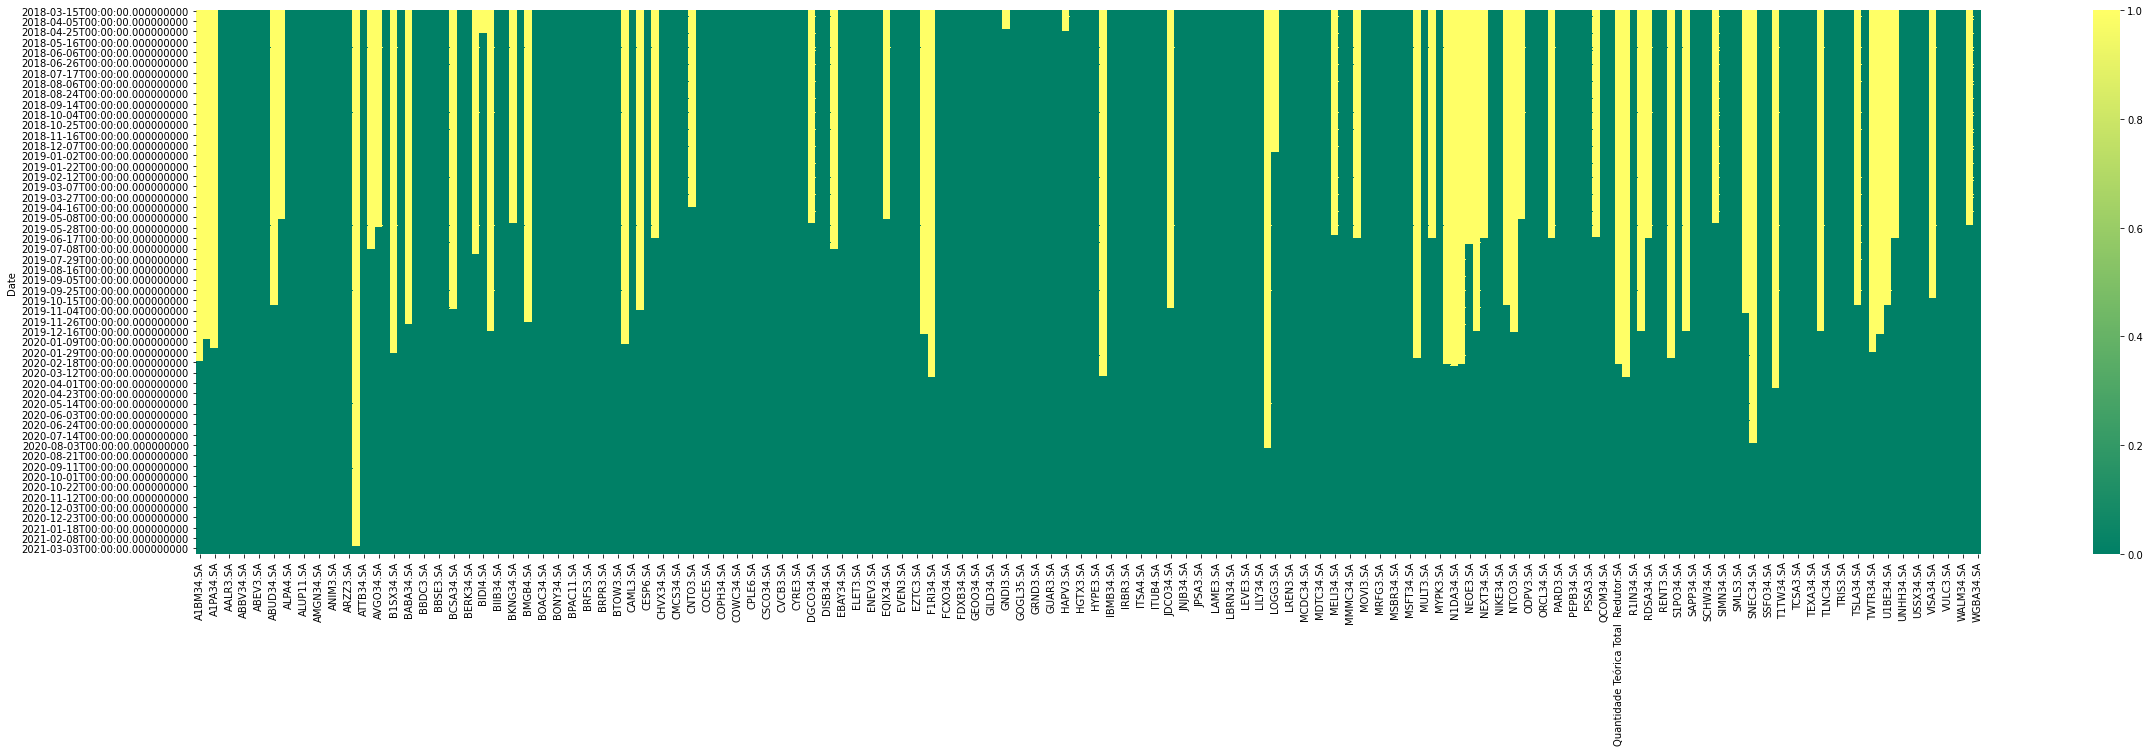

In [18]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=True, cmap = 'summer')

In [9]:
media_volumes = output.mean().sort_values(ascending=False)

In [10]:
media_volumes_cinquenta = media_volumes.head(50).index
media_volumes_cinquenta

Index(['MGLU3.SA', 'VULC3.SA', 'COGN3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ITSA4.SA',
       'ABEV3.SA', 'CIEL3.SA', 'IRBR3.SA', 'BBAS3.SA', 'JBSS3.SA', 'B3SA3.SA',
       'CMIG4.SA', 'BRML3.SA', 'HAPV3.SA', 'MRFG3.SA', 'BRFS3.SA', 'NTCO3.SA',
       'TAEE11.SA', 'EQTL3.SA', 'LAME4.SA', 'R1IN34.SA', 'REGN34.SA',
       'LREN3.SA', 'ENEV3.SA', 'ELET3.SA', 'BEEF3.SA', 'CYRE3.SA', 'JHSF3.SA',
       'MRVE3.SA', 'MEAL3.SA', 'MULT3.SA', 'BBSE3.SA', 'BBDC3.SA', 'GFSA3.SA',
       'CRFB3.SA', 'ASAI3.SA', 'CVCB3.SA', 'QUAL3.SA', 'WGBA34.SA', 'GNDI3.SA',
       'BTOW3.SA', 'NEOE3.SA', 'ENBR3.SA', 'BIDI4.SA', 'HYPE3.SA', 'AMAR3.SA',
       'BPAN4.SA', 'LIGT3.SA', 'CEAB3.SA'],
      dtype='object')

### Questão 2: 

In [11]:
#Período da amostra de Treinamento
start_date = '2018-03-15'
end_date = '2020-03-15'

output = None
sym=[]
for sy in tqdm(media_volumes_cinquenta): 
    try: 
        stock=data.DataReader(sy, 'yahoo',  start_date,  end_date)["Adj Close"]
        
        if output is None:
            df = stock
            output = df    
            sym.append(sy[:-3])
        else:
            df = stock
            output=pd.concat([output,df],axis=1)     
            sym.append(sy[:-3])
    except:
        print("Erro "+sy)
output.columns=sym

 44%|████████████████████▋                          | 22/50 [00:50<00:59,  2.13s/it]

Erro R1IN34.SA


 74%|██████████████████████████████████▊            | 37/50 [01:25<00:28,  2.21s/it]

Erro ASAI3.SA


100%|███████████████████████████████████████████████| 50/50 [02:02<00:00,  2.46s/it]


['Erros', 1847, 'Ativos', 48]

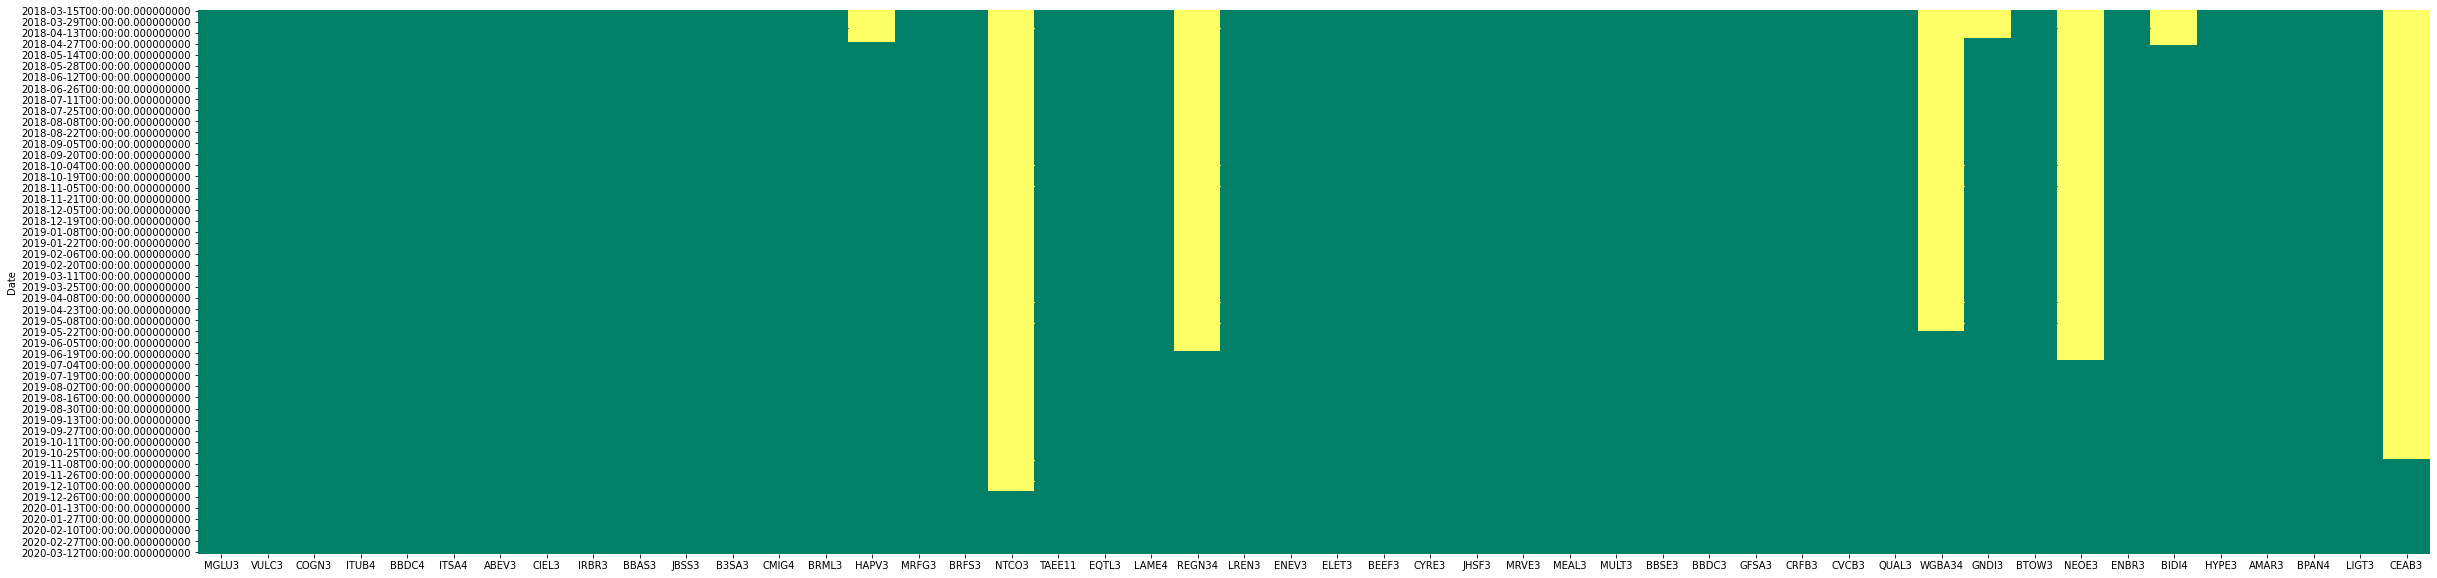

In [12]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

['Erros', 0, 'Ativos', 40]

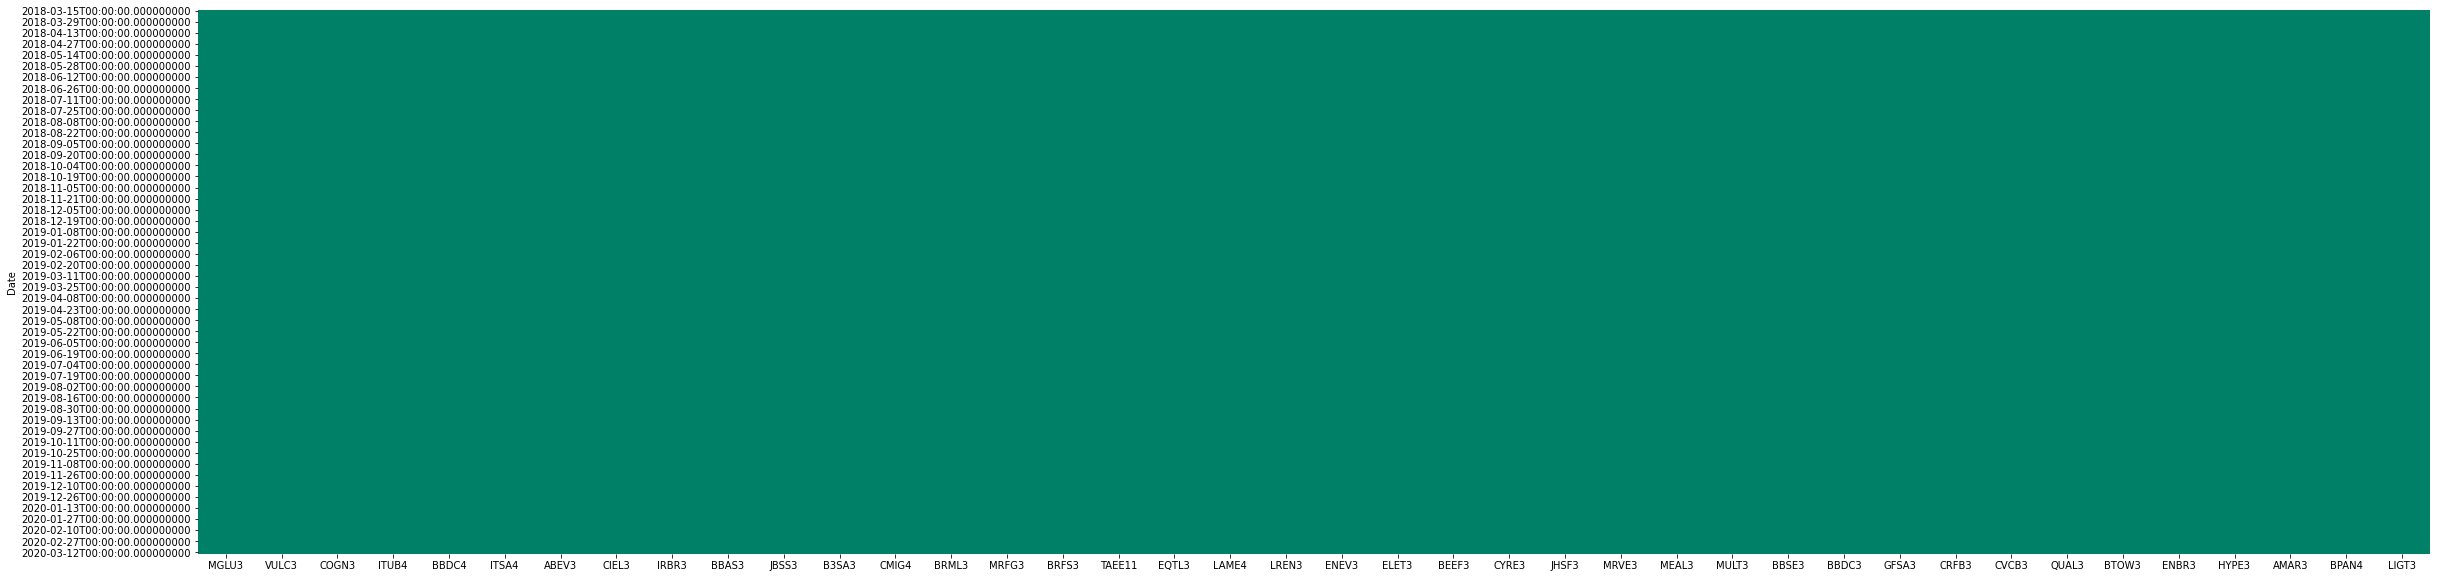

In [13]:
output=output.dropna(axis='columns')
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

### Questão 3: 

In [14]:
from sklearn.cluster import KMeans
wcss = []
retornos=100*output.pct_change()
stocks=retornos.columns
X=np.array([[np.std(retornos[sto]),np.mean(retornos[sto])] for sto in stocks])
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [15]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

Ativos com Melhor Relação em Cada Cluster: ['B3SA3', 'BTOW3', 'ENEV3', 'MGLU3', 'BPAN4']


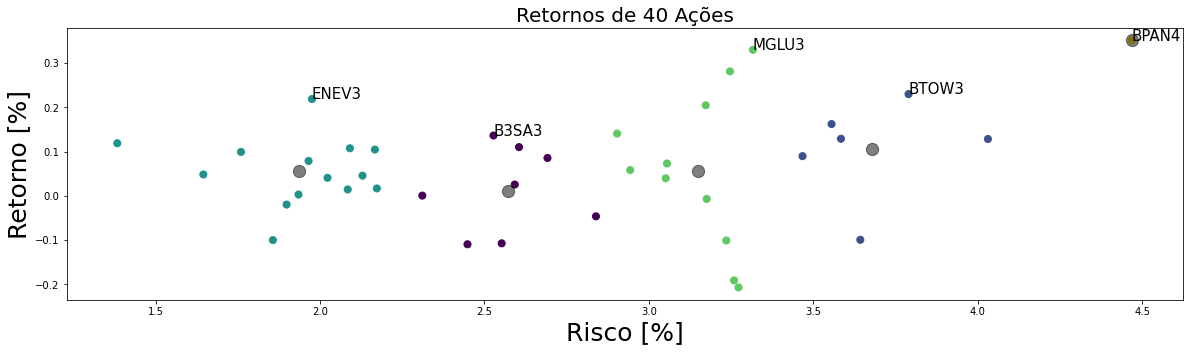

In [16]:
from math import *
retornos=100*output.pct_change()
stocks=retornos.columns


X=np.array([[np.std(retornos[sto]),np.mean(retornos[sto])] for sto in stocks])

N=optimal_number_of_clusters(wcss)

kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Retornos de '+str(len(stocks))+' Ações',fontsize=20)
ax1.set_xlabel('Risco [%]',fontsize=25)
ax1.set_ylabel('Retorno [%]',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.5);

best=[]
for i in range(N):
    ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
    
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

for r in rb:
    plt.text(X[stocks==r][0][0],X[stocks==r][0][1],r,fontsize=15)

### Questão 4: 

In [25]:
rb=list(pd.DataFrame(best).columns)

In [26]:
df=pd.DataFrame(output[rb])

In [27]:
ret=df.diff().dropna().copy()
ret=100*ret/df.iloc[0]

In [28]:
import random
def Portfolios(ret,ports):
    retp=[]
    risp=[]
    C=ret.cov()
    MU=ret.mean()
    SIG=ret.std()
    N=len(ret.columns)
    for i in tqdm(range(ports)):
        q = [random.randint(0,10000) for n in range(1,N+1)]
        s = sum(q)
        q = [ i/s for i in q ]

        retp.append(np.dot(pd.DataFrame(q).transpose(),MU[0]))
        risp.append(np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))[0][0])
    return retp, risp, SIG, MU
    
retp, risp, SIG, MU=Portfolios(ret,1000)

100%|█████████████████████████████████████████| 1000/1000 [00:00<00:00, 1335.84it/s]


In [29]:
def TPM_Fronteira(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    #N=1000
    a=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
    b=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
    c=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    target_mus=np.arange(-0.5,1.0,0.002)
    risk_at_target_mus=np.zeros(len(target_mus))
    for i in tqdm(range(0, len(target_mus))):
        target_mu=target_mus[i]
        v1=np.linalg.det([[target_mu,b[0][0]],[1,d[0][0]]])*np.dot(np.linalg.inv(C),pd.DataFrame(MU))
        v2=np.linalg.det([[a[0][0],target_mu],[c[0][0],1]])*np.dot(np.linalg.inv(C),pd.DataFrame(ONE))
        v3=np.linalg.det([[a[0][0],b[0][0]],[c[0][0],d[0][0]]])
        opt_q=(v1+v2)/v3
        risk_at_target_mus[i]=(np.dot(np.dot(pd.DataFrame(opt_q).transpose(),C),pd.DataFrame(opt_q)))**0.5
    return risk_at_target_mus, target_mus

risk_at_target_mus, target_mus = TPM_Fronteira(ret,1000)

100%|███████████████████████████████████████████| 750/750 [00:00<00:00, 1388.08it/s]


In [30]:
def TPM_Menor_Risco(ret):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
    q_minrisk=np.dot(np.linalg.inv(C),pd.DataFrame(ONE))/d
    mu_minrisk=np.dot(q_minrisk.transpose(),MU.values)
    risk_minrisk=(np.dot(np.dot(pd.DataFrame(q_minrisk).transpose(),C),pd.DataFrame(q_minrisk)))**0.5
    return q_minrisk,mu_minrisk,risk_minrisk

q_minrisk,mu_minrisk,risk_minrisk = TPM_Menor_Risco(ret)

In [33]:
def TPM_Maior_Sharpe(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    rf=0.00
    temp=np.dot(np.linalg.inv(C),pd.DataFrame(MU-np.dot(ONE,rf)))
    qm=temp/temp.sum()
    mu_m=np.dot(qm.transpose(),MU)
    sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),C),pd.DataFrame(qm)))**0.5
    return qm,mu_m,sigma_m

qm,mu_m,sigma_m = TPM_Maior_Sharpe(ret,1000)


Os pesos dos ativos no portifólio de menor risco: [-0.45, -0.29, 1.32, 0.45, -0.03]



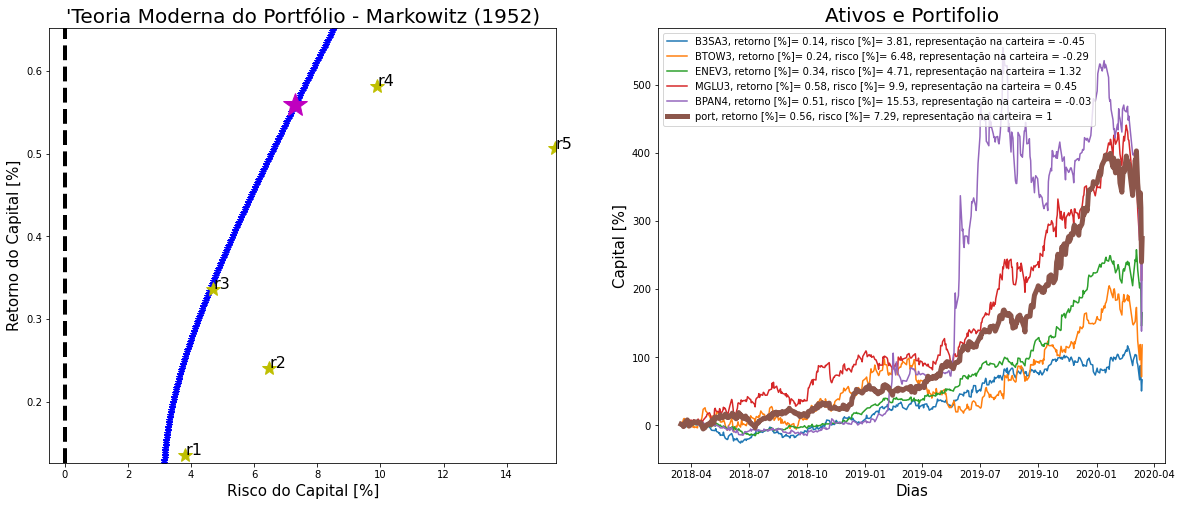

In [35]:
fig = plt.subplots(figsize=(20,8))
ax1=plt.subplot(1,2, 1) 
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)

ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,mu_minrisk,'k*',markersize=25)

ax1.plot(sigma_m,mu_m,'m*',markersize=25)


plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.07])
ax1.axvline(x= 0, color= 'k',linestyle='dashed',linewidth=4)
for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

ret['port']=pd.DataFrame(ret*[qm[i][0] for i in range(len(qm))]).sum(axis=1)
pesos=[qm[i][0] for i in range(len(qm))]+[1]
ax1.set_xlabel("Risco do Capital [%]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [%]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

ax2=plt.subplot(1,2, 2) 

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [%]= "+str(round(ret.mean()[i],2)) +", risco [%]= "+str(round(ret.std()[i],2))
    if i!=max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))     
    if i==max(range(len(ret.columns))):
        ax2.plot(ret[ret.columns[i]].cumsum(),linewidth=5.0,label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))  

ax2.legend(loc='upper left')
ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Capital [%]',fontsize=15)
ax2.set_title("Ativos e Portifolio",fontsize=20) 
print()
print('Os pesos dos ativos no portifólio de menor risco:',[round(qm[i][0],2) for i in range(len(qm))])
print()


ret=ret.drop(columns=['port'])

### Questão 5: 

### Questão 6: 